# Visualizing Errors

This tutorial covers how to visualize the confidence intervals predicted from error models.

In [1]:
import olorenchemengine as oce
import pandas as pd
import numpy as np

df = pd.read_csv(oce.download_public_file("MoleculeNet/load_lipo.csv"))[["smiles","exp"]]

# Use smaller dataset for speed, remove this line for full dataset
df = df.sample(1000)

dataset = oce.BaseDataset(data = df.to_csv(),
    property_col = "exp",
    structure_col = "smiles") + oce.RandomSplit()

model = oce.RandomForestModel(oce.OlorenCheckpoint("default"), n_estimators=1000)
model.fit(*dataset.train_dataset)


To complete installation of Oloren ChemEngine, either:
    (1) Run oce.online() to use the demonstration package, Oloren ChemEngine Online,
    (2) Install the missing dependencies, instructions can be found oce.MISSING_DEPENDENCIES(), or
    (3) Email contact@oloren.ai with subject "Oloren ChemEngine Enterprise", for a secure privately hosted
        Server version.

Oloren ChemEngine online is the public, dependency-free version of OCE, which compiles OCE code locally for fast,
parallelized, remote execution on Oloren's cloud solution. Oloren ChemEngine online SHOULD NOT BE USED FOR
CONFIDENTAIL DATA, and is only intended for demonstration purposes. The securely privately hosted Server version is
called Oloren ChemEngine Enterprise.



We start by building and fitting an error model using the training and validation dataset, respectively.

In [8]:
error_model = oce.TrainDistDC(ci=0.8, bins=10)
error_model.build(model, *dataset.train_dataset)

100%|██████████| 100/100 [00:01<00:00, 54.74it/s]


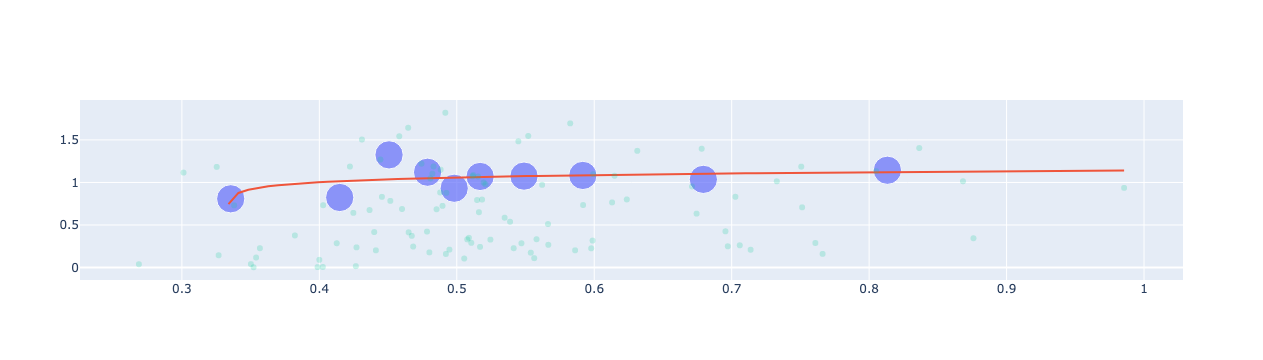

In [9]:
error_model.fit(*dataset.valid_dataset)

We are now ready to predict errors. 

In [10]:
pred = model.predict(dataset.test_dataset[0])
err = error_model.score(dataset.test_dataset[0])

100%|██████████| 100/100 [00:01<00:00, 52.76it/s]


Visualizations can be performed with the ```VisualizeError``` class, a ```BaseVisualization``` object. We must input the reference dataset, the predicted value, and the error value.

In [11]:
vis = oce.VisualizeError(dataset, pred[0], err[0])
vis.render_ipynb()

The green plot is a density plot of outputs from the reference dataset. The probable property value range for the target molecule is shaded in purple, and the predicted property value is the purple dividing line.